In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from ppo import PPOAGENT
from DQN import DQNAGENT
from sac import SACAgent
from td3 import TD3Agent

In [21]:
def plot_rewards(rewards, training_time=None, title='', xlabel='Episode', ylabel='Reward'):
    """
    Plot the rewards over episodes/time.
    
    Args:
        rewards (list): List that contains tuples (rewards, label)
        training_time (float, optional): Total training time in seconds.
    """
    plt.figure(figsize=(8,5))
    for reward, label in rewards:
        if training_time is None:
            plt.plot(reward, label=label)
        else:  
            # Resample the reward list to match training time
            if len(reward) > training_time:
                reward = reward[::len(reward)//training_time]

            t_reward = np.linspace(0, training_time, len(reward))
            plt.plot(t_reward, reward, label=label)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()
    

# Continuous Action Space

### Experiment 1: Pendulum-v1

In [36]:
env = gym.make("Pendulum-v1")
num_episodes = 100
training_time = 480  # 480 seconds = 8 minutes

In [37]:
sac = SACAgent(
    env=env,
)
sac_rewards = sac.learn(num_episodes=num_episodes)

100%|██████████| 100/100 [03:48<00:00,  2.29s/it]


In [38]:
td3 = TD3Agent(
    env=env,
)
td3_rewards = td3.learn(num_episodes=num_episodes)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:21<00:00,  1.42s/it]


In [39]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(num_episodes=num_episodes)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


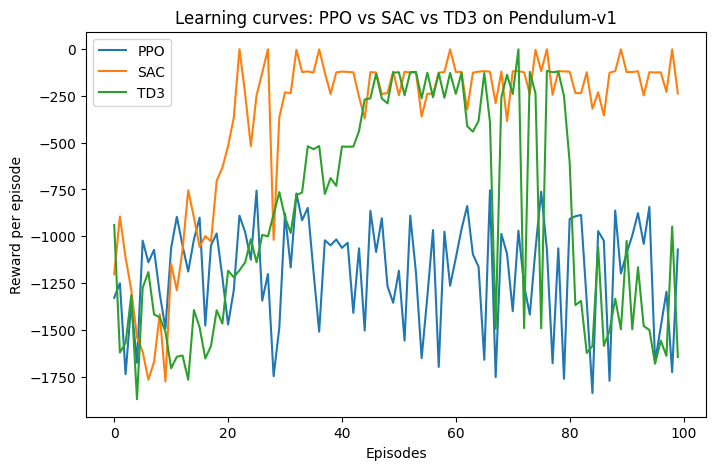

In [41]:
plot_rewards(
    rewards=[
        (ppo_rewards, "PPO"),
        (sac_rewards, "SAC"),
        (td3_rewards, "TD3")
    ],
    title="Learning curves: PPO vs SAC vs TD3 on Pendulum-v1",
    xlabel="Episodes",
    ylabel="Reward per episode"
)


In [ ]:
sac = SACAgent(
    env=env,
)
sac_rewards = sac.learn(max_training_time=training_time)

  2%|▏         | 193/10000 [08:01<6:47:28,  2.49s/it]


In [90]:
td3 = TD3Agent(
    env=env,
)
td3_rewards = td3.learn(max_training_time=training_time)

  0%|          | 37/100000 [53:23<2403:48:27, 86.57s/it]


In [88]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(max_training_time=training_time)

  9%|▊         | 866/10000 [08:00<1:24:26,  1.80it/s]


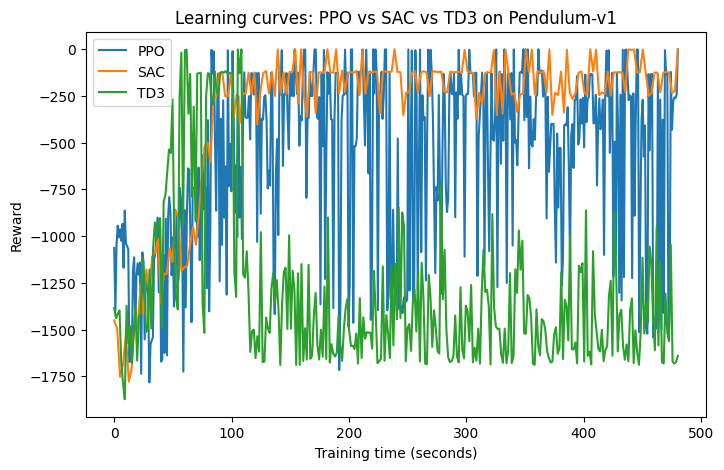

In [89]:
plot_rewards(
    rewards=[
        (ppo_rewards, "PPO"),
        (sac_rewards, "SAC"),
        (td3_rewards, "TD3")
    ],
    training_time=training_time,
    title="Learning curves: PPO vs SAC vs TD3 on Pendulum-v1",
    xlabel="Training time (seconds)",
    ylabel="Reward"
)

# Discrete Action Space

### Experiment 1: CartPole-v1

In [30]:
env = gym.make("CartPole-v1")
num_episodes = 500
training_time = 480  # 480 seconds = 8 minutes

In [31]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(num_episodes=num_episodes)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:31<00:00,  1.61it/s]


In [32]:
dqn = DQNAGENT(
    env=env,
)
dqn_rewards = dqn.learn(num_episodes=num_episodes)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [06:52<00:00,  1.21it/s]


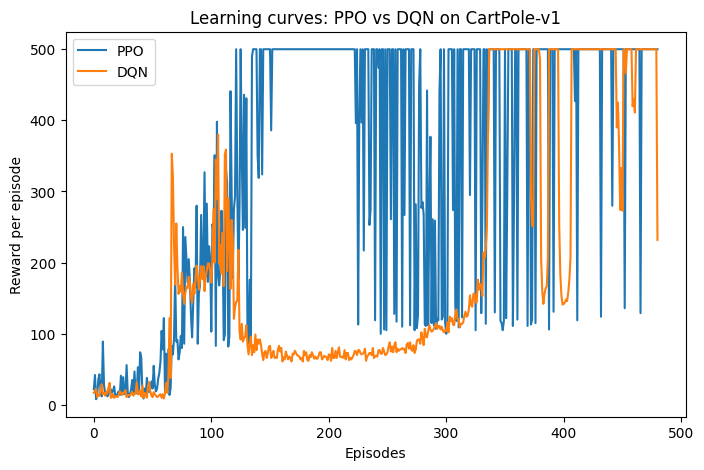

In [34]:
plot_rewards(
    [
        (ppo_rewards, "PPO"),
        (dqn_rewards, "DQN"),
    ],
    training_time=training_time,
    title="Learning curves: PPO vs DQN on CartPole-v1",
    xlabel="Episodes",
    ylabel="Reward per episode",
)

In [15]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(max_training_time=training_time)

  0%|          | 0/10000 [00:00<?, ?it/s]

 16%|█▌        | 1610/10000 [05:00<26:03,  5.37it/s]


In [17]:
dqn = DQNAGENT(
    env=env,
)
dqn_rewards = dqn.learn(max_training_time=training_time)

  0%|          | 393/100000 [05:00<21:08:30,  1.31it/s]


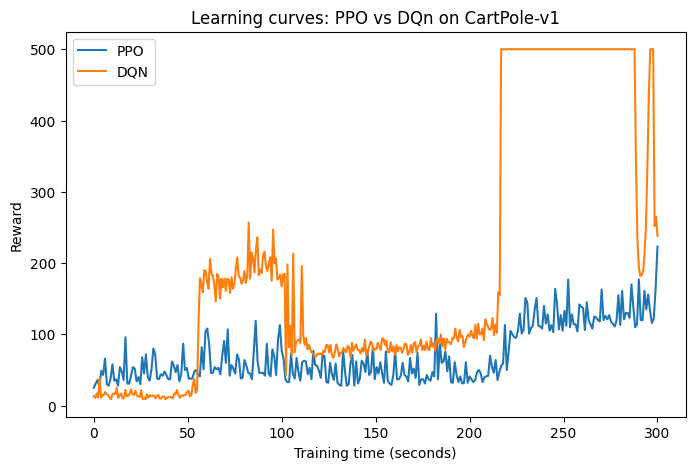

In [ ]:
plot_rewards(
    [
        (ppo_rewards, "PPO"),
        (dqn_rewards, "DQN"),
    ],
    training_time=training_time,
    title="Learning curves: PPO vs DQN on CartPole-v1",
    xlabel="Training time (seconds)",
    ylabel="Reward",
)